<a href="https://colab.research.google.com/github/olyviah82/linearregression/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

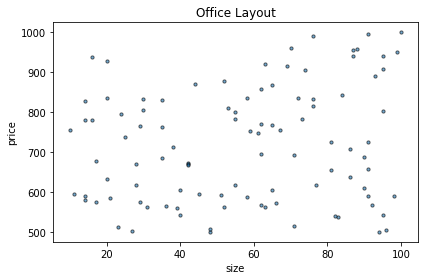

In [7]:
dataset=pd.read_csv('MOCK_DATA (4).csv')
x=dataset['size']
y=dataset['price']
plt.scatter(x,y, s=10, alpha=0.6, edgecolor='black', linewidth=1)
plt.title('Office Layout')
plt.xlabel('size')
plt.ylabel('price')

plt.tight_layout()
plt.show()



In [8]:
from scipy import stats

In [9]:
x

0     20
1     91
2     81
3     91
4     20
      ..
95    71
96    17
97    95
98    63
99    62
Name: size, Length: 100, dtype: int64

In [10]:
y

0     929
1     657
2     725
3     591
4     632
     ... 
95    693
96    575
97    908
98    564
99    695
Name: price, Length: 100, dtype: int64

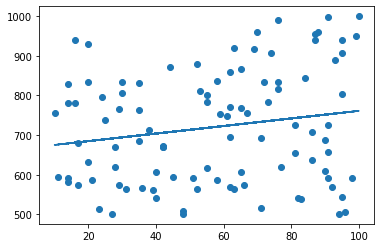

In [11]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [14]:
model = LinearRegression()
model.fit(dataset[['size']], dataset['price'])
y_2 = model.predict(dataset[['size']])
dataset['y_predicted'] = y_2
print(dataset.head(20))

    size  price  y_predicted
0     20    929   684.757875
1     91    657   752.532939
2     81    725   742.987156
3     91    591   752.532939
4     20    632   684.757875
5     27    502   691.439924
6     98    591   759.214988
7     73    783   735.350529
8     96    506   757.305831
9     31    563   695.258237
10    62    568   724.850167
11    55    618   718.168118
12    70    960   732.486793
13    58    836   721.031853
14    72    835   734.395950
15    16    782   680.939562
16    88    959   749.669204
17    53    811   716.258961
18    99    950   760.169566
19    76    991   738.214264


In [18]:
r_sq = model.score(dataset[['size']], dataset['price'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.0324536919798587


In [19]:
print(f"intercept: {model.intercept_}")

intercept: 665.6663077716084


In [20]:
print(f"slope: {model.coef_}")

slope: [0.95457837]


In [22]:
y_pred = model.predict(dataset[['size']])
print(f"predicted response:\n{y_pred}")

predicted response:
[684.75787512 752.53293919 742.98715551 752.53293919 684.75787512
 691.43992369 759.21498776 735.35052858 757.30583102 695.25823715
 724.85016654 718.16811797 732.48679348 721.03185307 734.39595021
 680.93956165 749.66920409 716.25896123 760.16956612 738.21426368
 693.34908042 761.12414449 723.89558817 684.75787512 689.53076695
 718.16811797 692.39450205 700.03112899 736.30510694 747.76004735
 753.48751755 728.66848001 739.16884205 714.3498045  685.71245348
 727.71390164 675.21209144 681.89414001 724.85016654 693.34908042
 715.30438287 676.16666981 703.84944246 725.80474491 679.03040491
 756.35125266 724.85016654 721.03185307 751.57836082 752.53293919
 727.71390164 708.6223343  738.21426368 755.39667429 699.07655062
 756.35125266 715.30438287 679.03040491 744.89631225 711.4860694
 727.71390164 703.84944246 699.07655062 721.98643144 694.30365879
 692.39450205 705.75859919 738.21426368 707.66775593 729.62305837
 754.44209592 679.03040491 702.89486409 694.30365879 718.

In [16]:
# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dataset['price'], dataset['y_predicted'])
print(mse)


19584.64625954965


In [23]:
# Building the model
m = 0
c = 0

In [24]:
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent



In [26]:
n = float(len(dataset['size'])) # Number of elements in X


In [27]:
x

0     20
1     91
2     81
3     91
4     20
      ..
95    71
96    17
97    95
98    63
99    62
Name: size, Length: 100, dtype: int64

In [28]:
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

10.17530545702254 23.924085497827907


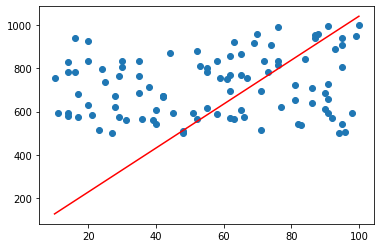

In [32]:
# Making predictions
Y_pred = m*x + c

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()